In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from time import time

In [2]:
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

In [3]:
nb_classes = 9
batch_size = 64
nb_epoch = 100
np.random.seed(1337) # for reproducibility

In [4]:
model = Sequential()

In [5]:
model.add(Dense(input_dim=784, output_dim=200, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(input_dim=200, output_dim=200, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(input_dim=200, output_dim=200, init="uniform"))
model.add(Activation("relu"))
model.add(Dense(input_dim=200, output_dim=9, init="uniform"))
model.add(Activation("softmax"))

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')

In [7]:
features = joblib.load("./mldata/features_1200.mat")
labels = joblib.load("./mldata/lables_1200.mat")

features = np.array(features, 'int16')
labels = np.array(labels, 'int')

t0 = time()
def scale(X, eps = 0.001):
    # scale the data points s.t the columns of the feature space
    # (i.e the predictors) are within the range [0, 1]
    return (X - np.min(X, axis = 0)) / (np.max(X, axis = 0) + eps)

features = features.astype("float32")
features = scale(features)

print "escape time : ", round(time()-t0, 3), "s"

escape time :  0.09 s


the shape of train set 5400 rows, 784 columns
the shape of test set 300 rows, 784 columns
the shape of validation set 300 rows, 784 columns
Test score : 0.379678235882
Test accuracy : 0.926041666667


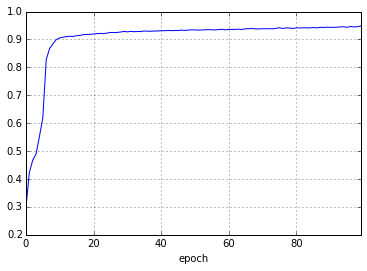

In [8]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.1)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 4800 rows, 784 columns
the shape of test set 600 rows, 784 columns
the shape of validation set 600 rows, 784 columns
Test score : 0.275536666021
Test accuracy : 0.925438596491


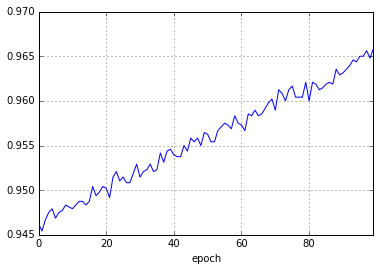

In [9]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.2)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 4200 rows, 784 columns
the shape of test set 900 rows, 784 columns
the shape of validation set 900 rows, 784 columns
Test score : 0.214903105641
Test accuracy : 0.946120689655


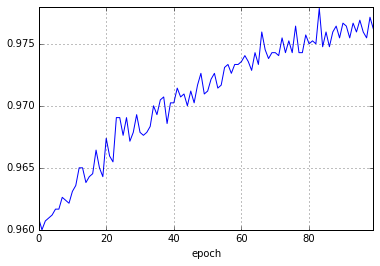

In [10]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.3)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 3600 rows, 784 columns
the shape of test set 1200 rows, 784 columns
the shape of validation set 1200 rows, 784 columns
Test score : 0.194620458136
Test accuracy : 0.954769736842


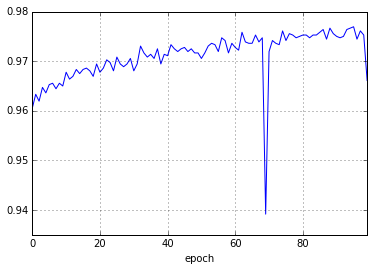

In [11]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.4)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 3000 rows, 784 columns
the shape of test set 1500 rows, 784 columns
the shape of validation set 1500 rows, 784 columns
Test score : 0.149166063932
Test accuracy : 0.959441489362


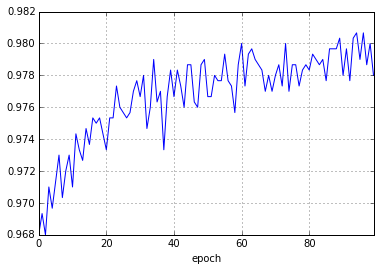

In [12]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.5)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 2400 rows, 784 columns
the shape of test set 1800 rows, 784 columns
the shape of validation set 1800 rows, 784 columns
Test score : 0.124339131878
Test accuracy : 0.964364035088


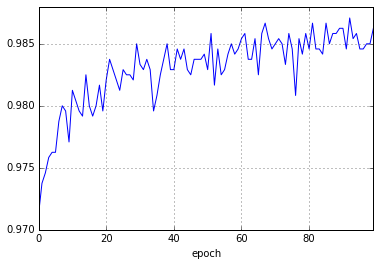

In [13]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.6)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 1800 rows, 784 columns
the shape of test set 2100 rows, 784 columns
the shape of validation set 2100 rows, 784 columns
Test score : 0.1457118613
Test accuracy : 0.965814393939


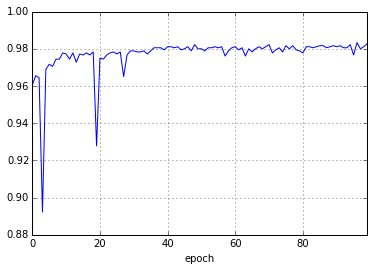

In [14]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.7)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 1200 rows, 784 columns
the shape of test set 2400 rows, 784 columns
the shape of validation set 2400 rows, 784 columns
Test score : 0.119248937321
Test accuracy : 0.97125


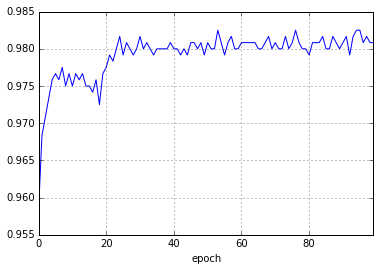

In [15]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.8)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

the shape of train set 600 rows, 784 columns
the shape of test set 2700 rows, 784 columns
the shape of validation set 2700 rows, 784 columns
Test score : 0.138082786799
Test accuracy : 0.962009803922


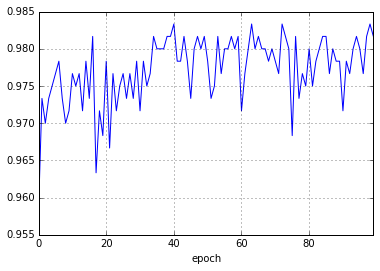

In [16]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.9)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

df = pd.DataFrame(mm)
df.index = df['epoch']
df['acc'].plot()

In [19]:
# scale the data to the range [0, 1] and then construct the training
# and testing splits
(trainX, testX, trainY, testY) = train_test_split(features, labels, test_size = 0.43)
(valX, testX, valY, testY) = train_test_split(testX, testY, test_size = 0.5)

# convert class vectors to binary class matrices
trainY = np_utils.to_categorical(trainY, nb_classes)
testY = np_utils.to_categorical(testY, nb_classes)
valY = np_utils.to_categorical(valY, nb_classes)

print "the shape of train set %s rows, %s columns" %(trainX.shape[0], trainX.shape[1])
print "the shape of test set %s rows, %s columns" %(testX.shape[0], testX.shape[1])
print "the shape of validation set %s rows, %s columns" %(valX.shape[0], valX.shape[1])

mm = model.fit(trainX, trainY,
               batch_size=batch_size,
               nb_epoch=100,
               show_accuracy=True,
               verbose=0,
               validation_data=(testX, testY))
score = model.evaluate(valX, valY, show_accuracy=True, verbose=0, batch_size=32)
print 'Test score : %s' %score[0]
print 'Test accuracy : %s' %score[1]

the shape of train set 3420 rows, 784 columns
the shape of test set 1290 rows, 784 columns
the shape of validation set 1290 rows, 784 columns
Test score : 0.109054098159
Test accuracy : 0.970274390244
